<a href="https://colab.research.google.com/github/Nightmare125/Speech-Emotion-Recognition/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O(e.g. pd.rad_csv)
import os #to use operating system dependent functionality
import librosa # To extract speech features
import wave # read and write WAV files
import matplotlib.pyplot as plt # to generate the visualisation


#MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import RMSprop

print("Loaded Libraries")

Loaded Libraries


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def extract_mfcc(wav_file_name):
# This function extracts mfcc features and obtains the mean of each dimension
# Input : path_to_wav_file
# Output : mfcc_features '''
 y, sr = librosa.load(wav_file_name)
 mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
 return mfccs

##Load Dataset


In [4]:
speech_labels = [] #to save extracted labels/file
speech_data =[] #to save extracted features
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ravdess'):
  for filename in filenames:
    #print(os.path.join(dirname, filename))
    speech_labels.append(int(filename[7:8]) - 1)#the index 7 and 8 of the file name represent the emotion label
    wav_file_name = os.path.join(dirname, filename)
    speech_data.append(extract_mfcc(wav_file_name))
print("Dataset Loaded")


Dataset Loaded


In [ ]:
speech_data

In [ ]:
# convert label and data to arrays
speech_data_array = np.asarray(speech_data)#convert input into an array
speech_label_array = np.array(speech_labels)
speech_label_array.shape #get tuple of array dimensions

# make categorical labels
labels_categorical = to_categorical(speech_label_array) #converts a class vector to binary matrix
labels_categorical.shape

In [7]:
speech_data_array.shape

(1455, 40)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(np.array(speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [9]:
from tensorflow.python import training
#Split the training, validating and testing sets
number_of_samples = speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples *0.1)


In [14]:
#Define the LSTM Model
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128, return_sequences=False, input_shape=(40,1)))
  model.add(Dense(64))
  model.add((Dropout(0.4)))
  model.add(Activation("relu"))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation("relu"))
  model.add(Dense(8))
  model.add(Activation("softmax"))
  
  #configures the model for training
  model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
  return model

 
 

In [15]:
w = np.expand_dims(speech_data_array[:training_samples], -1)

In [16]:
w.shape

(1164, 40, 1)

In [24]:
#train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(speech_data_array[:training_samples], -1), labels_categorical[:training_samples], validation_data=(np.expand_dims(speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs = 200, shuffle = True)

Epoch 1/200
37/37 [==============================] - 6s 80ms/step - loss: 2.0769 - accuracy: 0.1400 - val_loss: 2.0518 - val_accuracy: 0.1586
Epoch 2/200
37/37 [==============================] - 2s 62ms/step - loss: 2.0540 - accuracy: 0.1615 - val_loss: 2.0424 - val_accuracy: 0.2138
Epoch 3/200
37/37 [==============================] - 2s 62ms/step - loss: 2.0433 - accuracy: 0.1615 - val_loss: 2.0262 - val_accuracy: 0.2276
Epoch 4/200
37/37 [==============================] - 2s 62ms/step - loss: 2.0229 - accuracy: 0.1993 - val_loss: 1.9711 - val_accuracy: 0.3862
Epoch 5/200
37/37 [==============================] - 2s 60ms/step - loss: 1.9803 - accuracy: 0.2311 - val_loss: 1.9496 - val_accuracy: 0.2552
Epoch 6/200
37/37 [==============================] - 2s 61ms/step - loss: 1.9527 - accuracy: 0.2440 - val_loss: 1.9488 - val_accuracy: 0.2552
Epoch 7/200
37/37 [==============================] - 2s 61ms/step - loss: 1.9586 - accuracy: 0.2208 - val_loss: 1.8980 - val_accuracy: 0.3241
Epoch 

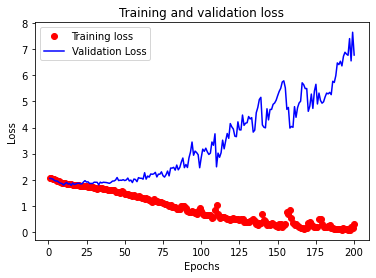

In [25]:
###Loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label ='Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()